<a href="https://colab.research.google.com/github/tomiambro/covid_transfer_learning/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
!pip install --upgrade git+https://github.com/fastai/fastai.git &> 2
!pip install pip install nbdev &> 2

In [2]:
from fastai.vision.all import *
from torchvision import transforms as T

In [3]:
from google.colab import drive

drive._mount('/content/gdrive')
root_path = 'gdrive/MyDrive/machine_learning/datasets/covid_dataset'  #change dir to your project folder

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


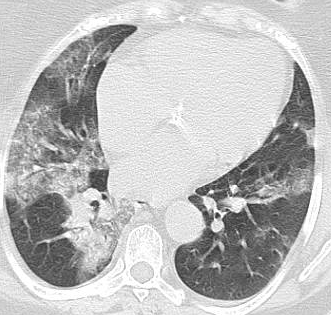

In [4]:
im = Image.open(f"{root_path}/COVID/Covid (1000).png")
im.to_thumb(350,350)

Create array with Path objects to imgs

In [5]:
path = Path(f"{root_path}")
fns = get_image_files(path)
fns

(#2481) [Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1227).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1229).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1226).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1209).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1238).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1233).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1205).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1220).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1216).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1223).png')...]

In [6]:
imgs = get_image_files(f"{root_path}")
imgs

(#2481) [Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1227).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1229).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1226).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1209).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1238).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1233).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1205).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1220).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1216).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1223).png')...]

In [7]:
covid = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(350))

covid

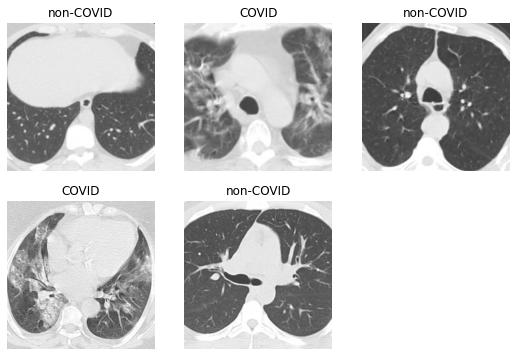

In [8]:
dls = covid.dataloaders(path)
dls.valid.show_batch(max_n=5)

In [9]:
learn = cnn_learner(dls, resnet18, metrics=FBeta(2))

SuggestedLRs(valley=0.0007079457864165306)

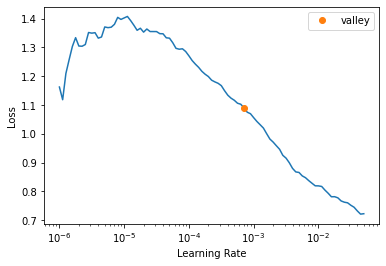

In [10]:
learn.lr_find(start_lr=1e-6, end_lr=0.1)

In [11]:
lr = 1e-3
learn.fine_tune(5, lr)

epoch,train_loss,valid_loss,fbeta_score,time
0,0.803552,0.716049,0.580205,00:39


epoch,train_loss,valid_loss,fbeta_score,time
0,0.462414,0.323819,0.865079,00:49
1,0.347318,0.173377,0.933280,00:47
2,0.230924,0.151974,0.951817,00:47
3,0.172396,0.143497,0.963050,00:47
4,0.127840,0.133392,0.966222,00:47


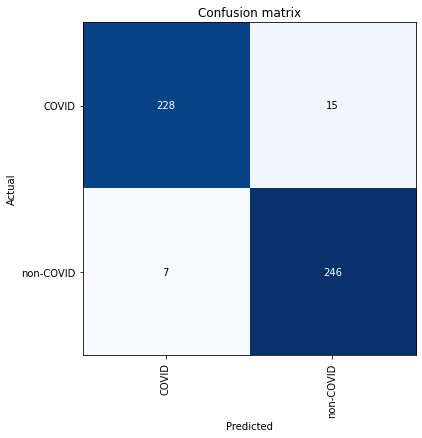

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6))

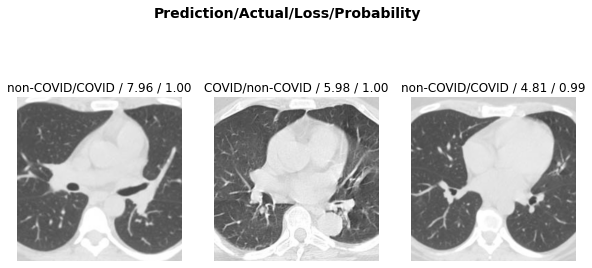

In [13]:
interp.plot_top_losses(3, figsize=(10,5))

In [14]:
covid = covid.new(
    item_tfms=Resize(350),
    batch_tfms=[DeterministicFlip, RandomErasing(p=.5, sh=.1)])
dls = covid.dataloaders(path)

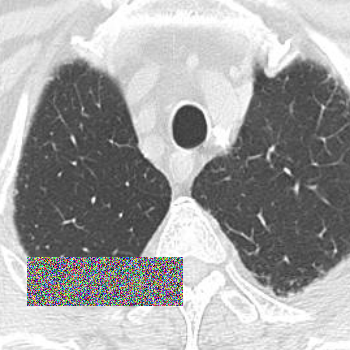

In [15]:
train_features, train_labels = next(iter(dls.train))
trans = T.ToPILImage()
trans(train_features[0])

In [16]:
learn = cnn_learner(dls, resnet18, metrics=FBeta(2))

In [17]:
lr = 1e-3
learn.fine_tune(5, lr)

epoch,train_loss,valid_loss,fbeta_score,time
0,0.889045,0.389029,0.862745,00:39


epoch,train_loss,valid_loss,fbeta_score,time
0,0.508833,0.262982,0.881883,00:49
1,0.416364,0.222808,0.939205,00:50
2,0.327818,0.175077,0.950511,00:49
3,0.248402,0.207387,0.951826,00:49
4,0.219627,0.193750,0.954969,00:49


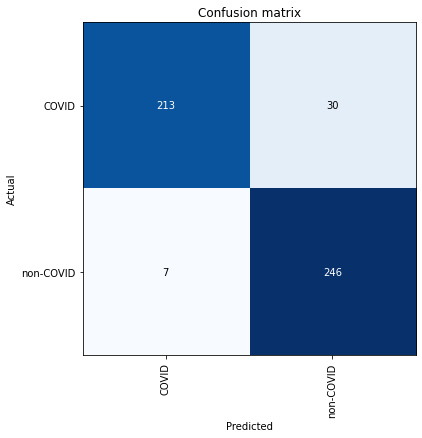

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6))

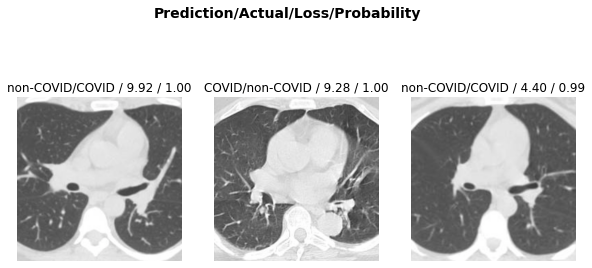

In [21]:
interp.plot_top_losses(3, figsize=(10,5))

In [20]:
learn = cnn_learner(dls, resnet34, metrics=FBeta(2))